In [1]:

import pandas as pd

# Lisez le fichier CSV en utilisant le chemin complet
df = pd.read_csv('data\\DATA_collecté.csv', header=0)

# Afficher les données du dataset
print("Afficher les données du dataset :")
print(df.info())




Afficher les données du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    927 non-null    object 
 1   Mortgage_15yr           927 non-null    float64
 2   Mortgage_30yr           927 non-null    float64
 3   Adjusted CPI            927 non-null    float64
 4   Gross Domestic Product  927 non-null    float64
 5   Home_price_index        927 non-null    float64
 6   Monthly_supply_houses   927 non-null    float64
 7   Personal_income         927 non-null    float64
 8   Population              927 non-null    float64
 9   Total_construction      927 non-null    float64
 10  Unemployment_rate       927 non-null    float64
dtypes: float64(10), object(1)
memory usage: 79.8+ KB
None


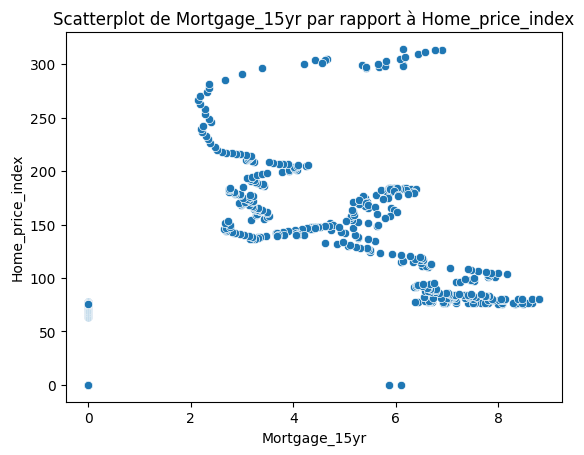

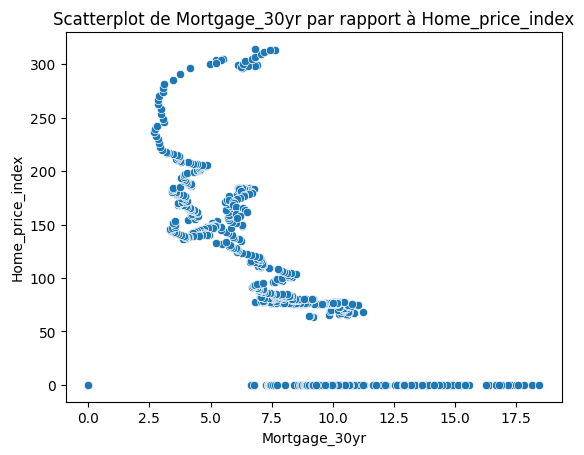

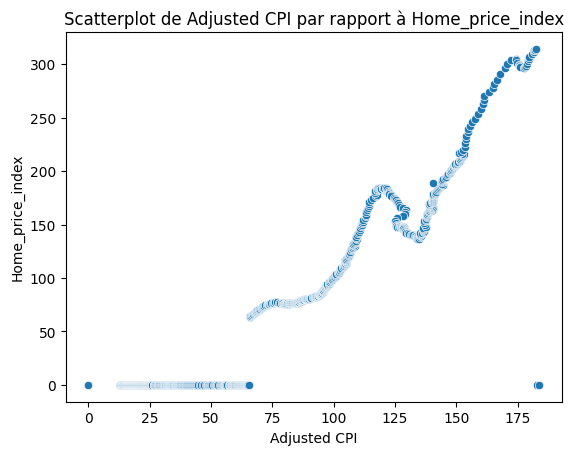

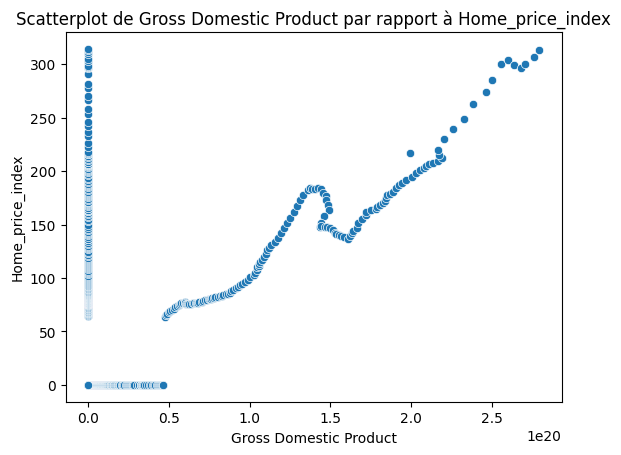

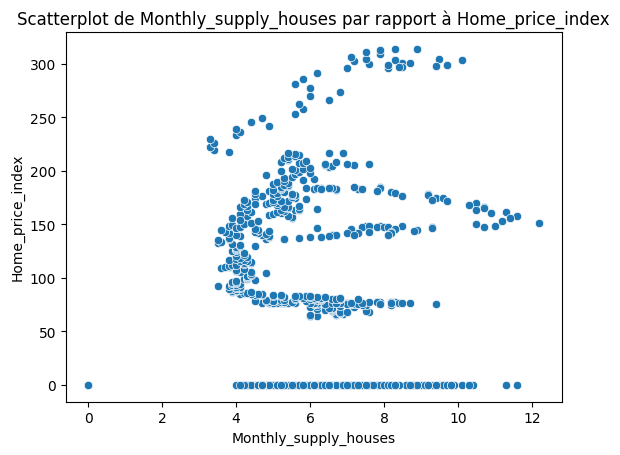

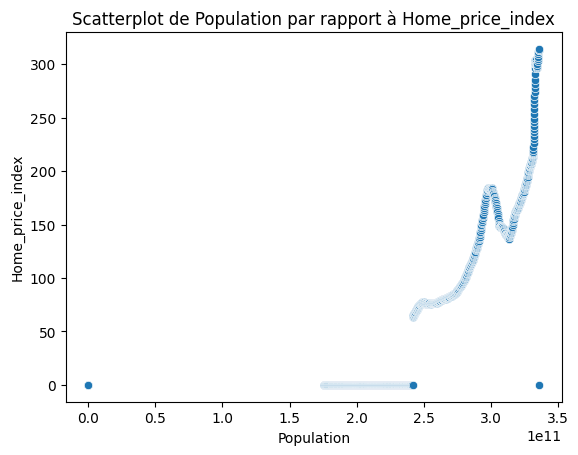

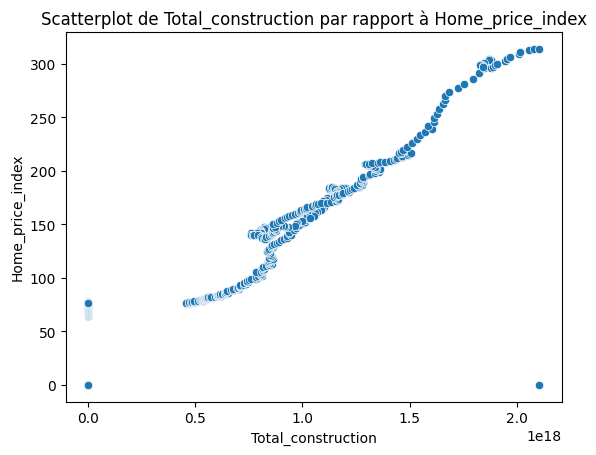

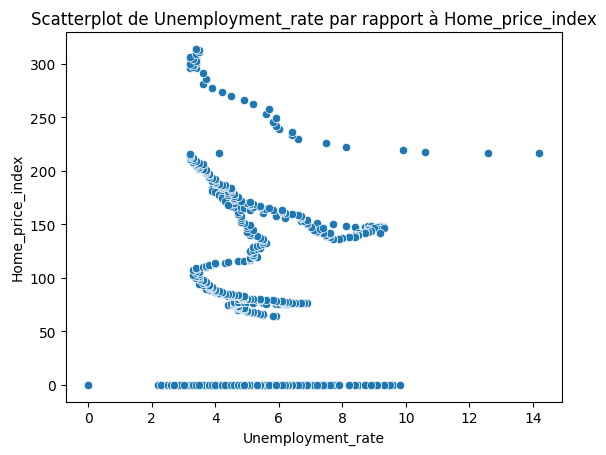

In [2]:
#################### EXPLORATION 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Créer des scatterplots pour chaque caractéristique par rapport à la variable cible "Home_price_index"
features = ['Mortgage_15yr', 'Mortgage_30yr', 'Adjusted CPI', 'Gross Domestic Product',
            'Monthly_supply_houses', 'Personal_income', 'Population', 'Total_construction',
            'Unemployment_rate']

for feature in features:
    sns.scatterplot(x=feature, y='Home_price_index', data=df)
    plt.title(f'Scatterplot de {feature} par rapport à Home_price_index')
    plt.xlabel(feature)
    plt.ylabel('Home_price_index')
    plt.show()

In [3]:
##  {{{{{{{{{1}}}}}  ####################  Traitement val manquante #########################


################################ Chercher les val Nan dans ce cas cest pas Nan mais cest remplacé par 0 #####################

import pandas as pd
import numpy as np
########### Puisque la data la plus importantes et HPI quon veut predire on va voi les anne ou elle est presente #########

# Identifier les périodes où la colonne 'Home_price_index' a une valeur nulle
periodes_nulles_home_price = df[df['Home_price_index'] == 0]['DATE']

# Afficher les périodes où 'Home_price_index' est nulle
print("\nPériodes où 'Home_price_index' est nulle :")
print(periodes_nulles_home_price)

# On remarque que dapres 1986 HPI existe 

# Filtrer les données à partir de 1986
df_1986_onwards = df[df['DATE'] >= '1986-01-01']

# Vérifier si des données existent à partir de 1986
if not df_1986_onwards.empty:
    print("Des données sur l'indice des prix des logements (HPI) existent à partir de 1986.")
else:
    print("Aucune donnée sur l'indice des prix des logements (HPI) à partir de 1986.")

#################Donc on garde que les anne apres  1986. et juque 2023 #######################
df = df.loc[(df['DATE'] >= '1986-01-01') & (df['DATE'] < '2023-01-01')]

print(df.info())

#Convertir 0 par Nan pour plus de sens et ne pas generer des problem pour les focntions qui utilise nan comme notion  ########
# Remplacer les zéros par des valeurs NaN
df.replace(0, np.nan, inplace=True)



Périodes où 'Home_price_index' est nulle :
0      1947-01-01
1      1947-02-01
2      1947-03-01
3      1947-04-01
4      1947-05-01
          ...    
478    1986-11-01
479    1986-12-01
924    2024-01-01
925    2024-02-01
926    2024-03-01
Name: DATE, Length: 483, dtype: object
Des données sur l'indice des prix des logements (HPI) existent à partir de 1986.
<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 468 to 911
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    444 non-null    object 
 1   Mortgage_15yr           444 non-null    float64
 2   Mortgage_30yr           444 non-null    float64
 3   Adjusted CPI            444 non-null    float64
 4   Gross Domestic Product  444 non-null    float64
 5   Home_price_index        444 non-null    float64
 6   Monthly_supply_houses   444 non-null    float64
 7   Personal_income         444 non-null    float64
 8   P

In [4]:

########### GDP présente des valeurs quartly donc les mois 1 4 7 et 10 #######################################

########################################v"Traitement d'Interpolation pour Remplir les Valeurs Manquantes de GDP  ###############################
import pandas as pd
import numpy as np

gdp = pd.DataFrame()  # Crée une nouvelle DataFrame pour stocker les données de GDP


gdp["Gross Domestic Product"]= df['Gross Domestic Product'].copy()
gdp["DATE"]=df['DATE'].copy()
print(gdp.head())

# Définir la colonne 'DATE' comme index pour faciliter l'interpolation
gdp.set_index('DATE', inplace=True)


# Effectuer l'interpolation pour remplir les valeurs manquantes de GDP
gdp['Gross Domestic Product'] = gdp['Gross Domestic Product'].interpolate(method='linear')

# Réinitialiser l'index pour revenir à la structure originale de la DataFrame
gdp.reset_index(inplace=True)

# Afficher les premières lignes de la DataFrame pour vérification
print(gdp.head())
print(gdp.tail())

#######remplacer gdp ancien par gdp traité apres tester le bon fonctionnement############
df.drop(columns=['Gross Domestic Product'], inplace=True)
# Fusionner les DataFrames df et gdp en utilisant la colonne 'DATE' comme clé de fusion
df = pd.merge(df, gdp[['DATE', 'Gross Domestic Product']], on='DATE', how='left')

# Afficher les premières lignes de la DataFrame fusionnée pour vérification
print(df.head())

df.to_excel("data\\Test1.xlsx")


     Gross Domestic Product        DATE
468            4.507894e+19  1986-01-01
469                     NaN  1986-02-01
470                     NaN  1986-03-01
471            4.545340e+19  1986-04-01
472                     NaN  1986-05-01
         DATE  Gross Domestic Product
0  1986-01-01            4.507894e+19
1  1986-02-01            4.520376e+19
2  1986-03-01            4.532858e+19
3  1986-04-01            4.545340e+19
4  1986-05-01            4.566116e+19
           DATE  Gross Domestic Product
439  2022-08-01            2.613256e+20
440  2022-09-01            2.627048e+20
441  2022-10-01            2.640840e+20
442  2022-11-01            2.640840e+20
443  2022-12-01            2.640840e+20
         DATE  Mortgage_15yr  Mortgage_30yr  Adjusted CPI  Home_price_index  \
0  1986-01-01            NaN        10.8860     64.914353               NaN   
1  1986-02-01            NaN        10.7100     64.796220               NaN   
2  1986-03-01            NaN        10.0800     64.4418

In [5]:
##############Aprs consulter teste1 on remarque que pour Total_construction on a les valeur dapres 1993############

#################Donc on garde que les anne apres  1993.  #######################
df = df.loc[(df['DATE'] >= '1993-01-01') ]
###On choisi de les supprimer pour avoir des valeurs plus exact et parceque la data est sufisante 
# Calculer le nombre de NaN dans chaque colonne
nombre_nan_par_colonne = df.isna().sum()

# Afficher le nombre de NaN dans chaque colonne
print("Nombre de NaN dans chaque colonne :")
print(nombre_nan_par_colonne)

############# Donc ona traité toutes les valeurs manquantes 
########Rearanger les colonnes pour avoir a predire comme la derniere ############
df=df[['DATE', 'Mortgage_15yr', 'Mortgage_30yr', 'Adjusted CPI', 'Gross Domestic Product', 'Monthly_supply_houses', 'Personal_income', 'Population', 'Total_construction', 'Unemployment_rate', 'Home_price_index']]

df.rename(columns={'Adjusted CPI': 'Consumer price index'}, inplace=True)
df.info()

Nombre de NaN dans chaque colonne :
DATE                      0
Mortgage_15yr             0
Mortgage_30yr             0
Adjusted CPI              0
Home_price_index          0
Monthly_supply_houses     0
Personal_income           0
Population                0
Total_construction        0
Unemployment_rate         0
Gross Domestic Product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 84 to 443
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Mortgage_30yr           360 non-null    float64
 3   Consumer price index    360 non-null    float64
 4   Gross Domestic Product  360 non-null    float64
 5   Monthly_supply_houses   360 non-null    float64
 6   Personal_income         360 non-null    float64
 7   Population              360 non-null    float64
 8   Total_c

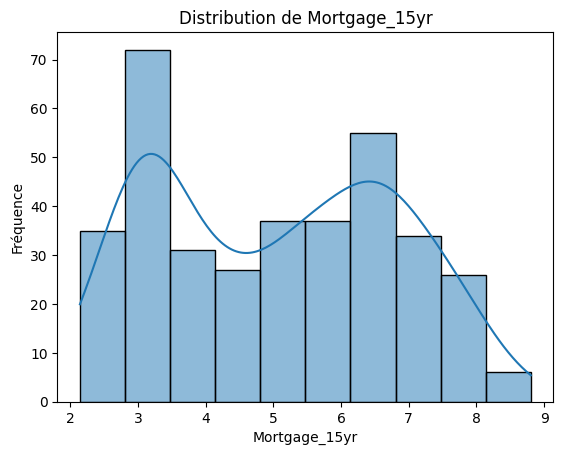

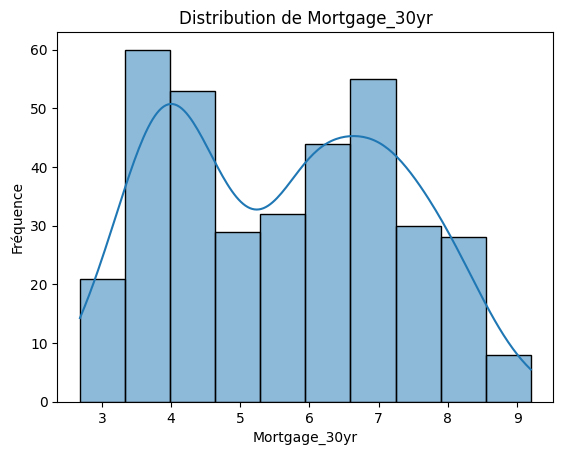

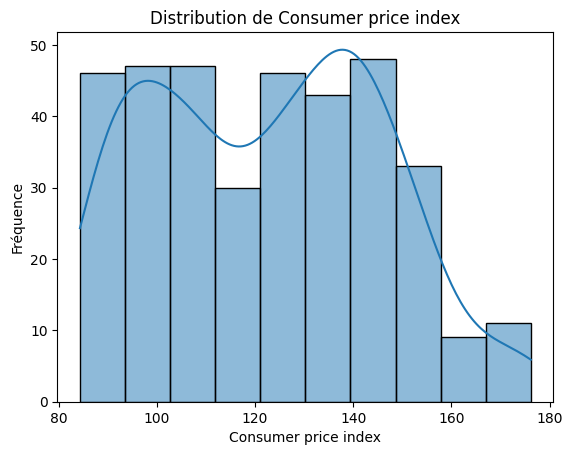

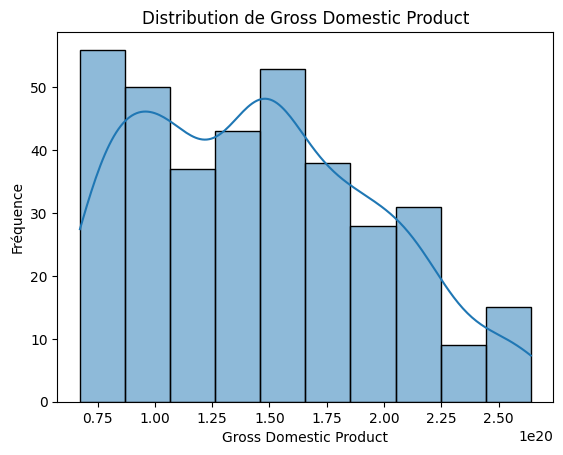

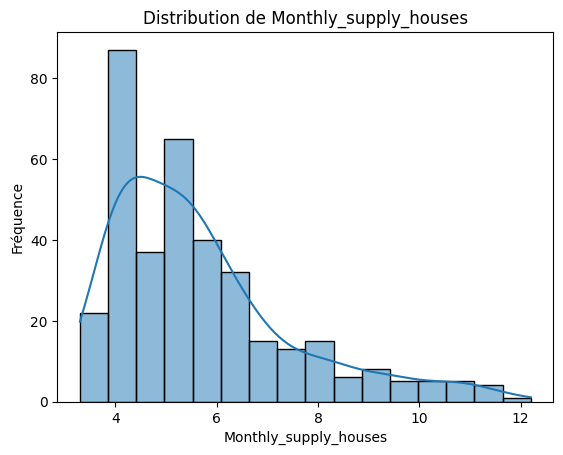

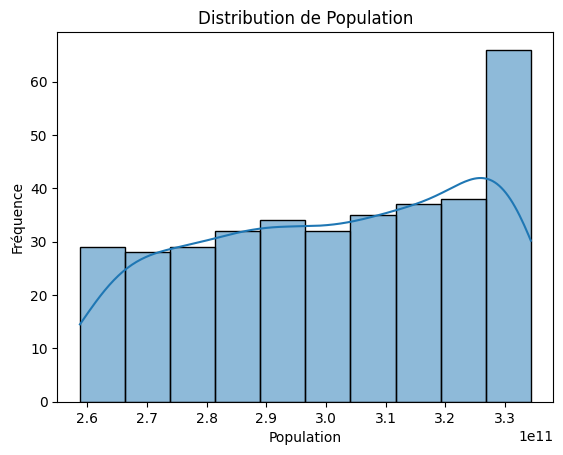

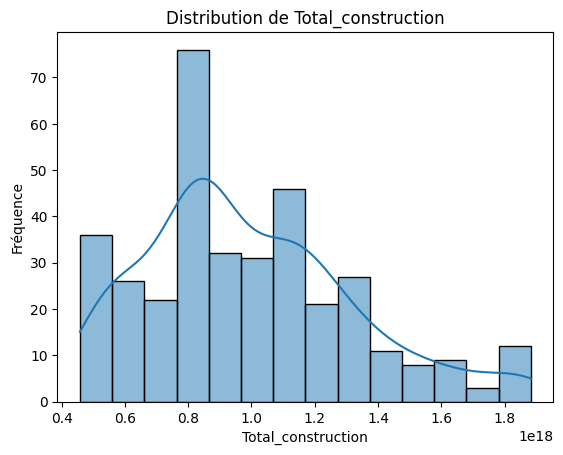

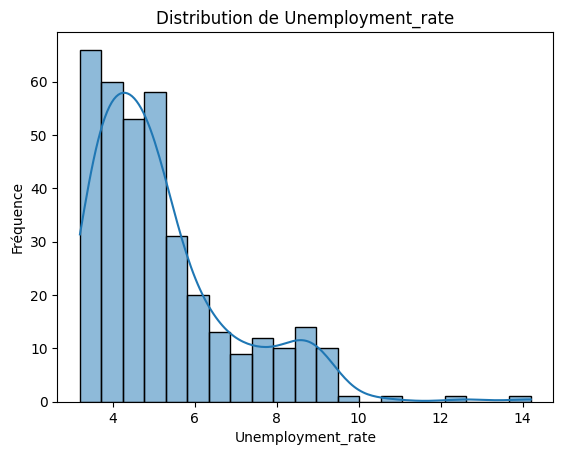

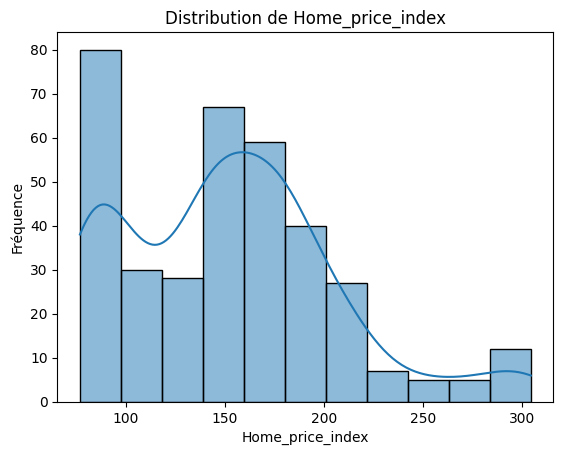

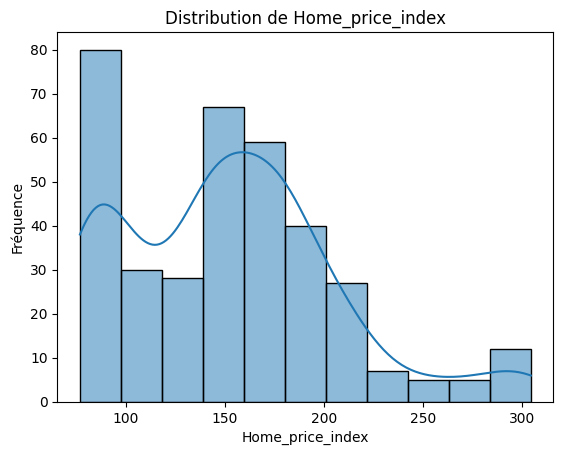

In [6]:
#######{{{{{{{{{2}}}}}################################# Exploration ##########################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Variables explicatives et cible
variables_explicatives = ['Mortgage_15yr', 'Mortgage_30yr', 'Consumer price index', 'Gross Domestic Product',
                          'Monthly_supply_houses', 'Personal_income', 'Population', 'Total_construction', 'Unemployment_rate']
variable_cible = 'Home_price_index'

# Sous-ensemble des données avec les variables d'intérêt
data_subset = df[variables_explicatives + [variable_cible]]

# Représentation graphique des distributions des variables
for variable in variables_explicatives + [variable_cible]:
    sns.histplot(data_subset[variable], kde=True)
    plt.title(f'Distribution de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()

# Analyse de la distribution de la variable cible
sns.histplot(data_subset[variable_cible], kde=True)
plt.title(f'Distribution de {variable_cible}')
plt.xlabel(variable_cible)
plt.ylabel('Fréquence')
plt.show()






In [7]:
"""la majorité des distributions desdonnées sont presque normales avec deux sommets (bimodales)
donc on peut utiliser Standardisation (z-score) : Cette méthode est appropriée pour les distributions normales ou presque normales.
mais on va tester plusieurd methode et choisir celle la plus performante """

############# METHODE 1 NORMALISER TOUS les variables  AVEC LA MEME METHODE #########################

######################## Tester methode de normalisation approprié #########################



from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error

# Sélection des variables explicatives
X = df[['Mortgage_15yr', 'Mortgage_30yr', 'Consumer price index', 'Gross Domestic Product',
          'Monthly_supply_houses', 'Personal_income', 'Population', 'Total_construction', 'Unemployment_rate']]

# Sélection de la variable cible
y = df['Home_price_index']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser les scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Initialiser un modèle de régression Ridge
model = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha selon vos besoins

# Pour chaque scaler
for scaler_name, scaler in scalers.items():
    # Normaliser les données d'entraînement et de test
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entraîner le modèle sur les données normalisées
    model.fit(X_train_scaled, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer l'erreur quadratique moyenne (mse)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Afficher les performances
    print(f"Performance avec {scaler_name}: mse = {mse:.2f}")

"""Performance avec StandardScaler: mse = 4.68
Performance avec MinMaxScaler: mse = 8.27
Performance avec RobustScaler: mse = 5.25

 le StandardScaler donne la meilleure performance en termes de mse, suivi par RobustScaler, 
 tandis que MinMaxScaler donne la performance la moins satisfaisante.
   Dans ce cas, le StandardScaler semble être le choix le plus approprié pour votre ensemble de données"""



Performance avec StandardScaler: mse = 4.68
Performance avec MinMaxScaler: mse = 8.27
Performance avec RobustScaler: mse = 5.25


'Performance avec StandardScaler: mse = 4.68\nPerformance avec MinMaxScaler: mse = 8.27\nPerformance avec RobustScaler: mse = 5.25\n\n le StandardScaler donne la meilleure performance en termes de mse, suivi par RobustScaler, \n tandis que MinMaxScaler donne la performance la moins satisfaisante.\n   Dans ce cas, le StandardScaler semble être le choix le plus approprié pour votre ensemble de données'

Différences de corrélation après la normalisation :
Mortgage_15yr            -0.145482
Mortgage_30yr            -0.115438
Consumer price index     -0.077767
Gross Domestic Product   -0.157044
Monthly_supply_houses    -0.171006
Personal_income          -0.158994
Population               -0.017986
Total_construction       -0.573355
Unemployment_rate         0.348510
dtype: float64
Mortgage_15yr            -0.699111
Mortgage_30yr            -0.707872
Consumer price index      0.926769
Gross Domestic Product    0.945313
Monthly_supply_houses     0.311259
Personal_income           0.936835
Population                0.885145
Total_construction        0.981200
Unemployment_rate        -0.086740
dtype: float64
Mortgage_15yr            -0.844593
Mortgage_30yr            -0.823310
Consumer price index      0.849002
Gross Domestic Product    0.788269
Monthly_supply_houses     0.140253
Personal_income           0.777841
Population                0.867158
Total_construction        0.407845
Unemploy

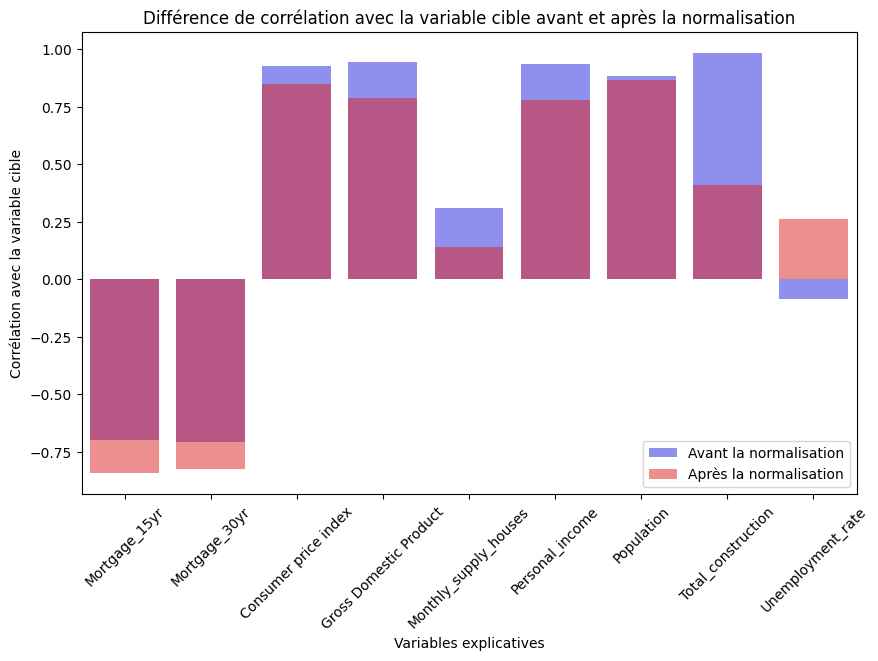

In [8]:
######################       Normalisation avec StandardScaler ###################



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Sélectionner uniquement les colonnes numériques à normaliser
numerical_columns_to_normalize = ['Mortgage_15yr', 'Mortgage_30yr', 'Consumer price index', 'Gross Domestic Product',
                                  'Monthly_supply_houses', 'Personal_income', 'Population', 'Total_construction', 'Unemployment_rate']

# Calcul de la corrélation avant la normalisation en excluant la colonne cible 'Home_price_index'
correlation_before = df[numerical_columns_to_normalize].corrwith(df['Home_price_index'])

# Normalisation des données explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns_to_normalize])
X_normalized = pd.DataFrame(X_scaled, columns=numerical_columns_to_normalize)

# Calcul de la corrélation après la normalisation
correlation_after = X_normalized.corrwith(df['Home_price_index'])

# Calcul des différences de corrélation
correlation_difference = correlation_after - correlation_before

# Affichage des différences de corrélation
print("Différences de corrélation après la normalisation :")
print(correlation_difference)

print(correlation_before)

print(correlation_after)

# Tracé des différences de corrélation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_before.index, y=correlation_before.values, color='blue', alpha=0.5, label='Avant la normalisation')
sns.barplot(x=correlation_after.index, y=correlation_after.values, color='red', alpha=0.5, label='Après la normalisation')
plt.title('Différence de corrélation avec la variable cible avant et après la normalisation')
plt.xlabel('Variables explicatives')
plt.ylabel('Corrélation avec la variable cible')
plt.xticks(rotation=45)
plt.legend()
plt.show()



#######On remarque que la normalisation a reduit limportance de chacun et a augulenter limportance dautre 
####mais elle est necessaire car on a des echelle de 1 a milliard donc on va avoir 2 dataset normalisé et nin normalisé et
## on va decider dans letape devaluation des model #######


<Figure size 1600x1200 with 0 Axes>

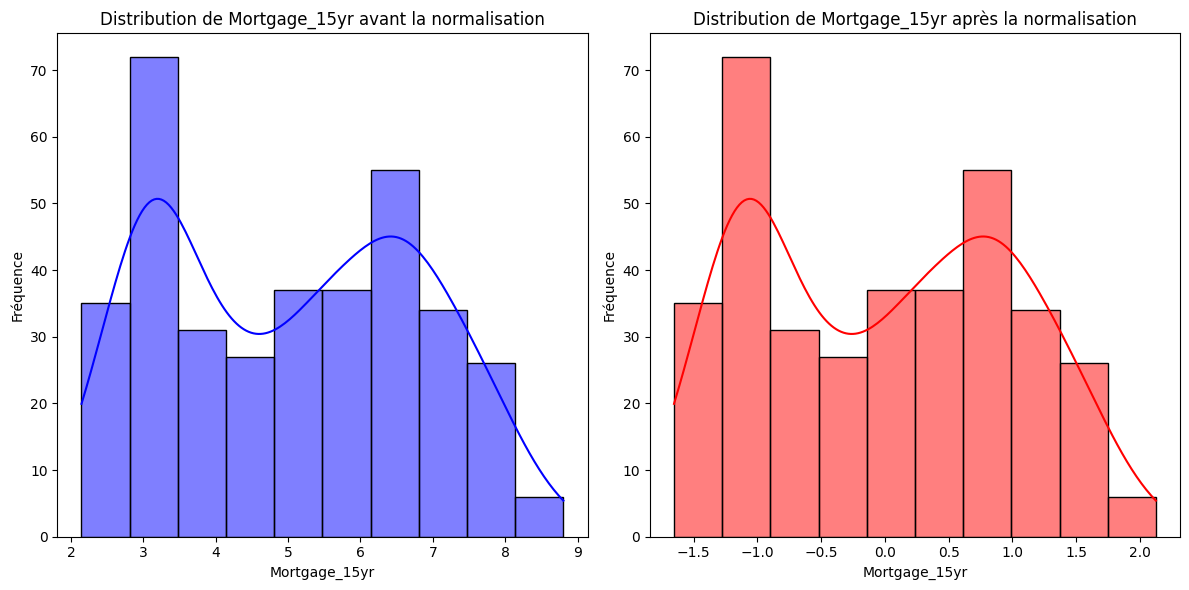

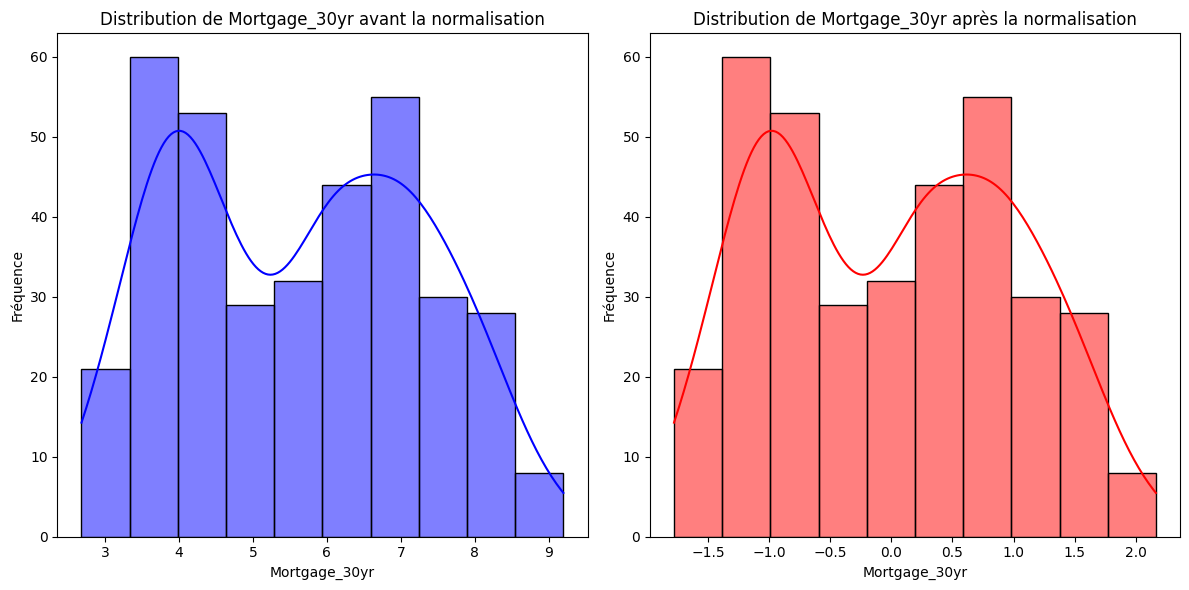

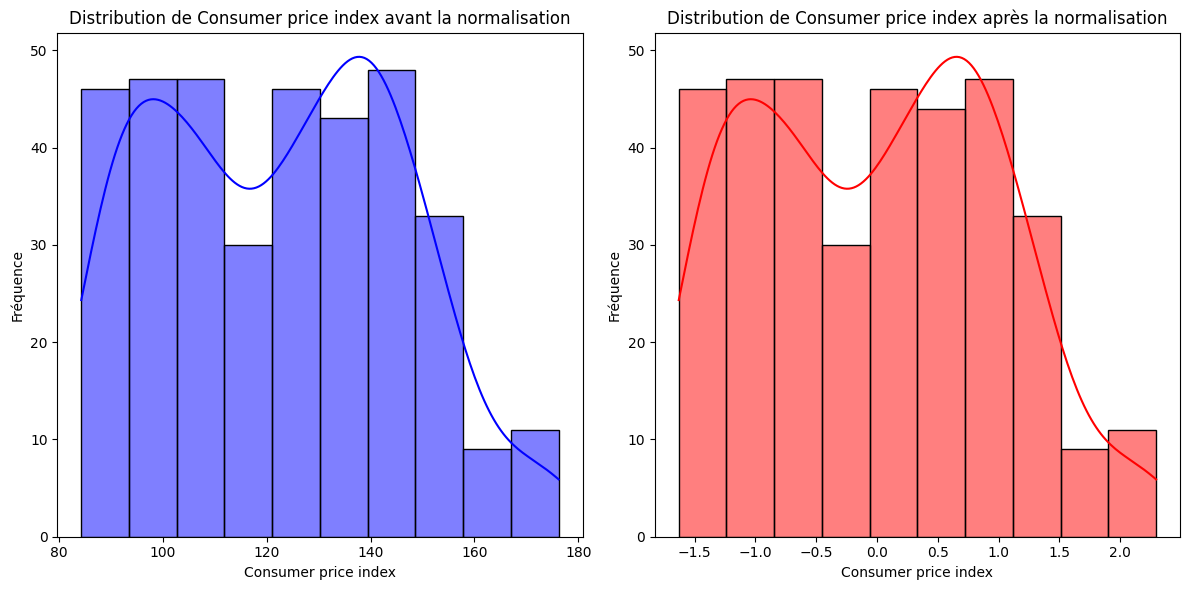

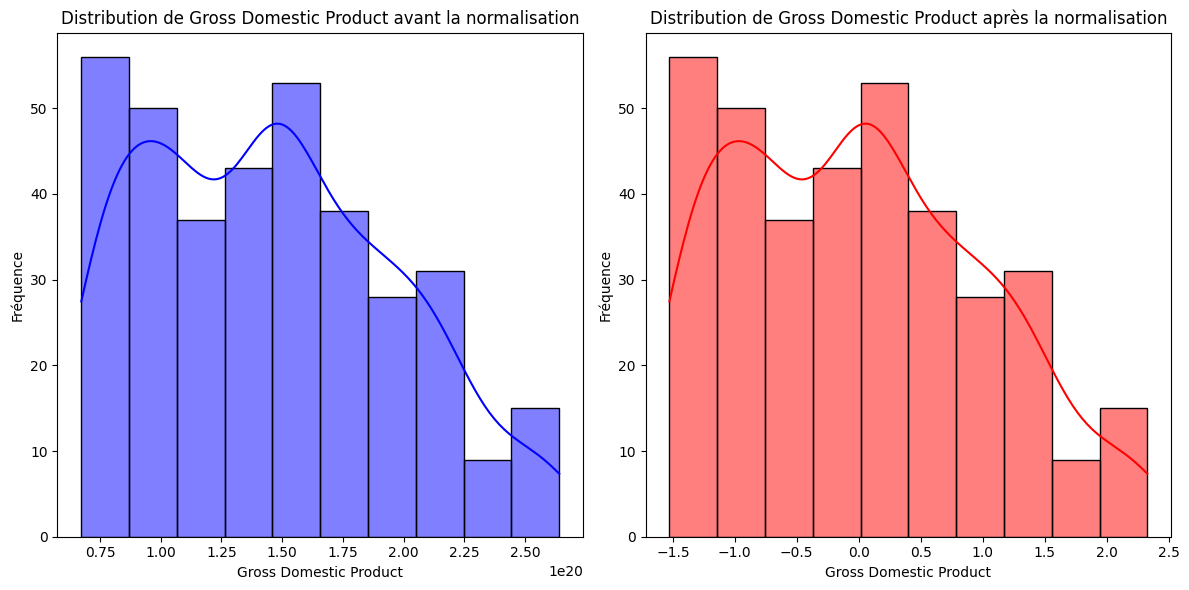

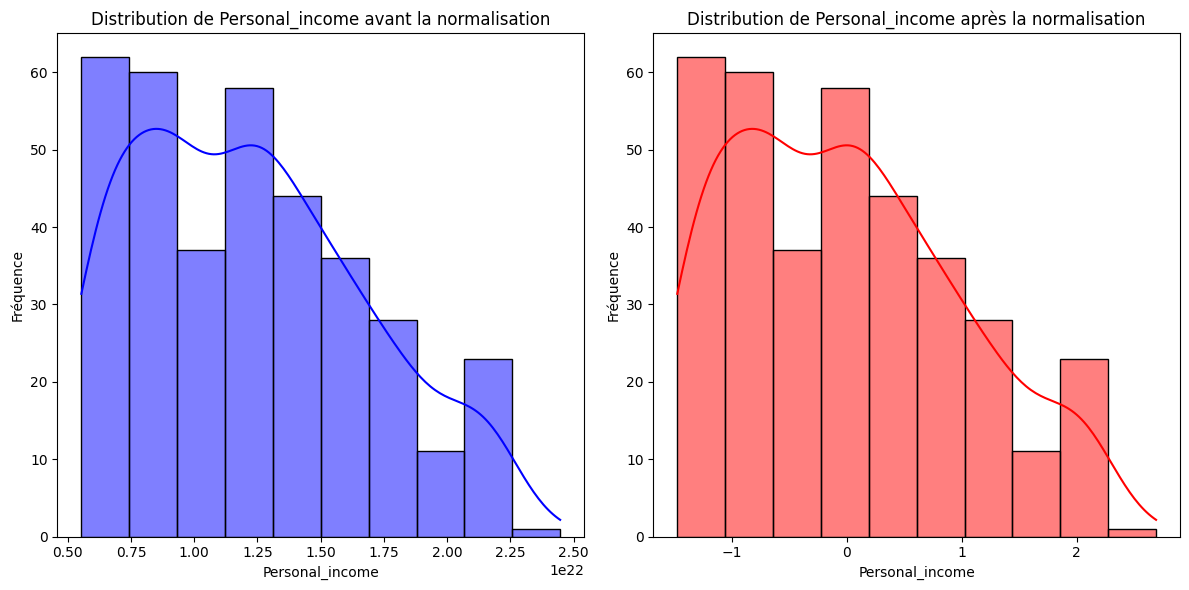

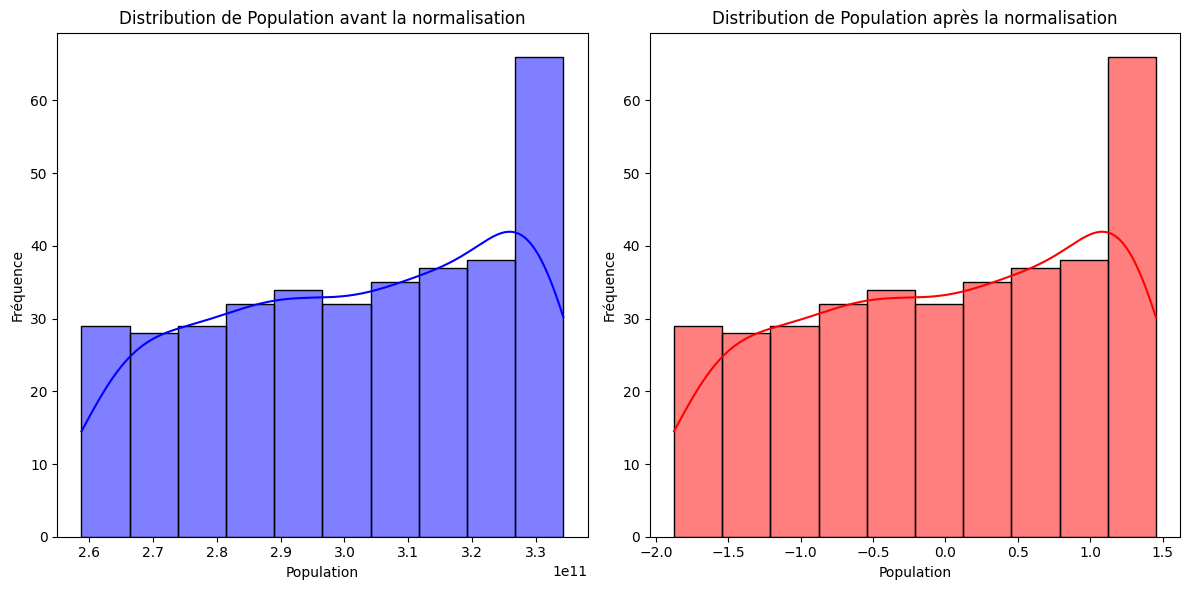

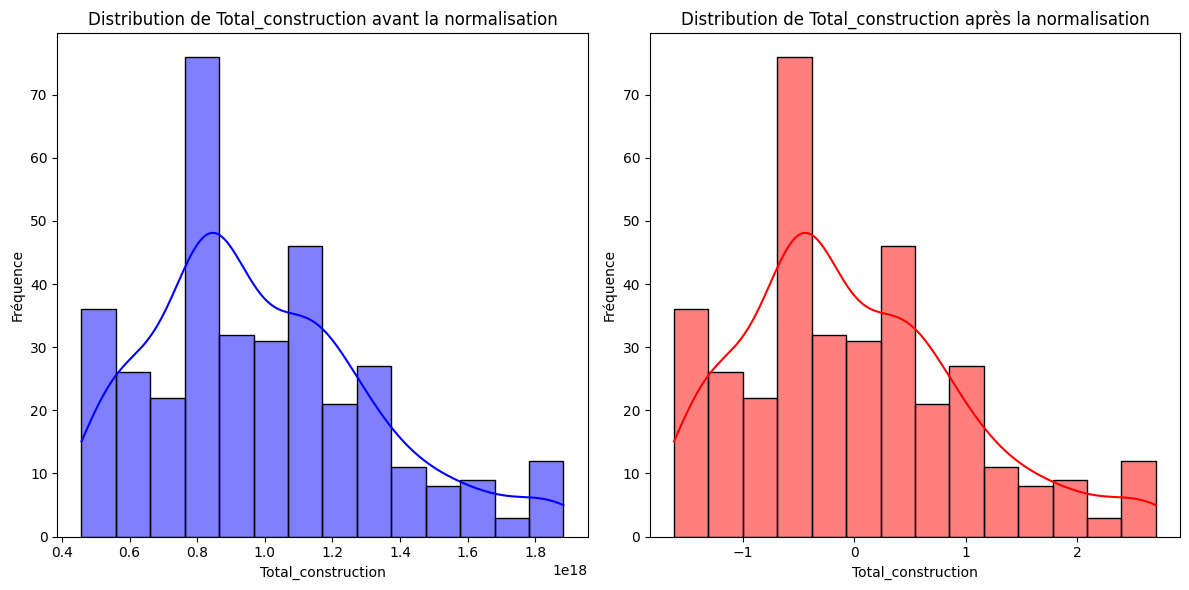

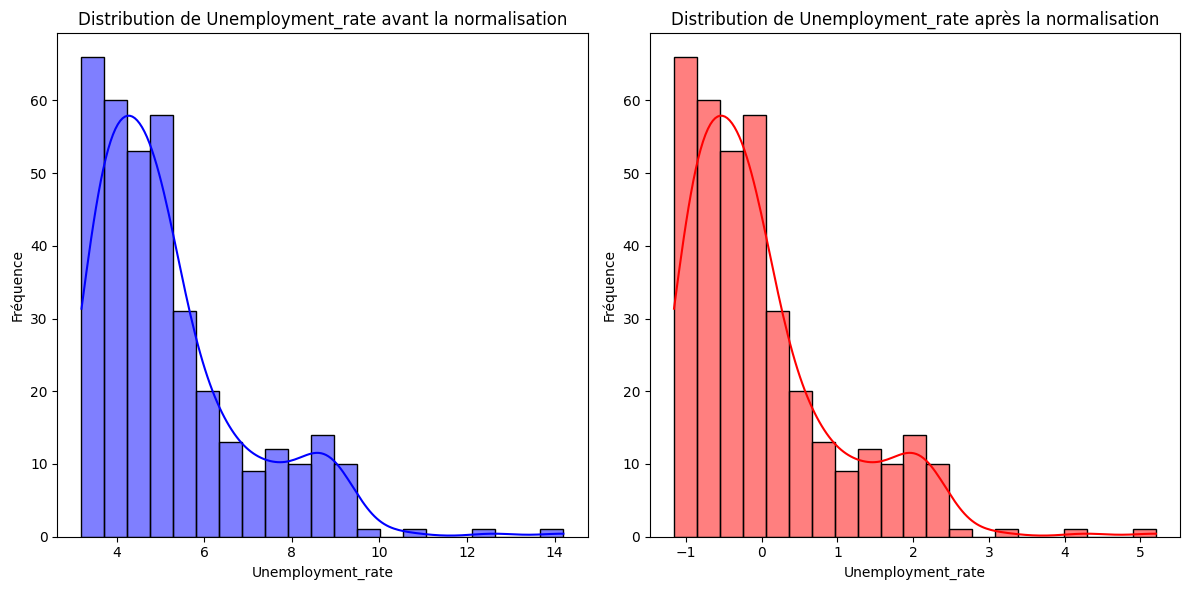

In [9]:
################################ Tracé de la distribution avant et après la normalisation ####################


# Liste des noms des variables explicatives
variables_explicatives = ['Mortgage_15yr', 'Mortgage_30yr', 'Consumer price index', 'Gross Domestic Product',
                          'Monthly_supply_houses', 'Personal_income', 'Population', 'Total_construction', 'Unemployment_rate']

# Tracé de la distribution avant et après la normalisation pour chaque variable explicative
plt.figure(figsize=(16, 12))
for variable in variables_explicatives:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], color='blue', kde=True)
    plt.title(f'Distribution de {variable} avant la normalisation')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    plt.subplot(1, 2, 2)
    sns.histplot(X_normalized[variable], color='red', kde=True)
    plt.title(f'Distribution de {variable} après la normalisation')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    plt.tight_layout()
    plt.show()


#La normalisation est nien car elle n'as pas changeé la distribution des variables explicatives 

Différences de corrélation avec la variable cible avant et après la normalisation :
Mortgage_15yr            -2.220446e-16
Mortgage_30yr             0.000000e+00
Consumer price index      0.000000e+00
Gross Domestic Product   -1.110223e-16
Monthly_supply_houses     0.000000e+00
Personal_income           0.000000e+00
Population                1.110223e-16
Total_construction        0.000000e+00
Unemployment_rate        -4.163336e-17
dtype: float64


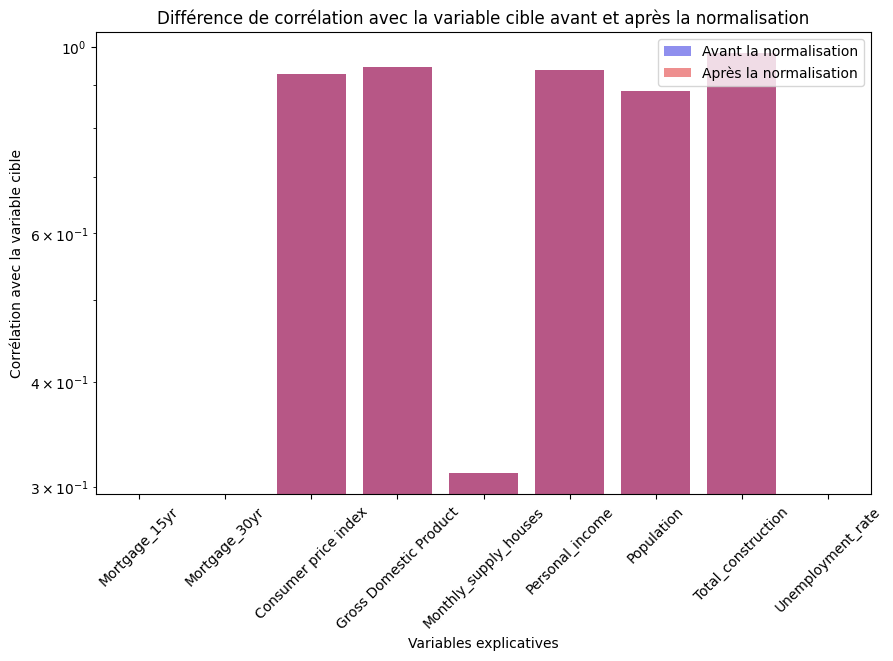

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 84 to 443
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Mortgage_30yr           360 non-null    float64
 3   Consumer price index    360 non-null    float64
 4   Gross Domestic Product  360 non-null    float64
 5   Monthly_supply_houses   360 non-null    float64
 6   Personal_income         360 non-null    float64
 7   Population              360 non-null    float64
 8   Total_construction      360 non-null    float64
 9   Unemployment_rate       360 non-null    float64
 10  Home_price_index        360 non-null    float64
dtypes: float64(10), object(1)
memory usage: 33.8+ KB
None


In [12]:
#################### METHODE 2 NORMALISER CHAQUE COLONNES AVEC UNE METHODE APROPRIE ################

# Création d'un dictionnaire pour stocker les scalers approprié pour chaque variable
scalers = {
    'Mortgage_15yr': MinMaxScaler(), 
    'Mortgage_30yr': MinMaxScaler(), 
    'Unemployment_rate': MinMaxScaler(), 
    'Consumer price index': MinMaxScaler(), 
    'Gross Domestic Product': StandardScaler(), 
    'Personal_income': StandardScaler(), 
    'Total_construction': StandardScaler(), 
    'Monthly_supply_houses': StandardScaler(), 
    'Population': MinMaxScaler()
}

df_normalized2=df.copy()
# Normalisation de chaque variable avec la méthode appropriée
for col, scaler in scalers.items():
    df_normalized2[col] = scaler.fit_transform(df[[col]])

# Exclure la colonne contenant les dates du DataFrame
df_without_dates = df.drop(columns=['DATE'])
df_without_dates_apres = df_normalized2.drop(columns=['DATE'])
# Calculer les corrélations avec la variable cible avant et après la normalisation
correlation_before = df_without_dates.corrwith(df_without_dates['Home_price_index']).drop('Home_price_index')
correlation_after = df_without_dates_apres.corrwith(df_normalized2['Home_price_index']).drop('Home_price_index')

# Convertir les différences de corrélation en entiers
correlation_difference = (correlation_after - correlation_before)

# Affichage des différences de corrélation
print("Différences de corrélation avec la variable cible avant et après la normalisation :")
print(correlation_difference)

# Tracé des différences de corrélation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_before.index, y=correlation_before.values, color='blue', alpha=0.5, label='Avant la normalisation')
sns.barplot(x=correlation_after.index, y=correlation_after.values, color='red', alpha=0.5, label='Après la normalisation')
plt.title('Différence de corrélation avec la variable cible avant et après la normalisation')
plt.yscale('log')
plt.xlabel('Variables explicatives')
plt.ylabel('Corrélation avec la variable cible')
plt.xticks(rotation=45)
plt.legend()
plt.show()


print(df_normalized2.info())


<Figure size 1600x1200 with 0 Axes>

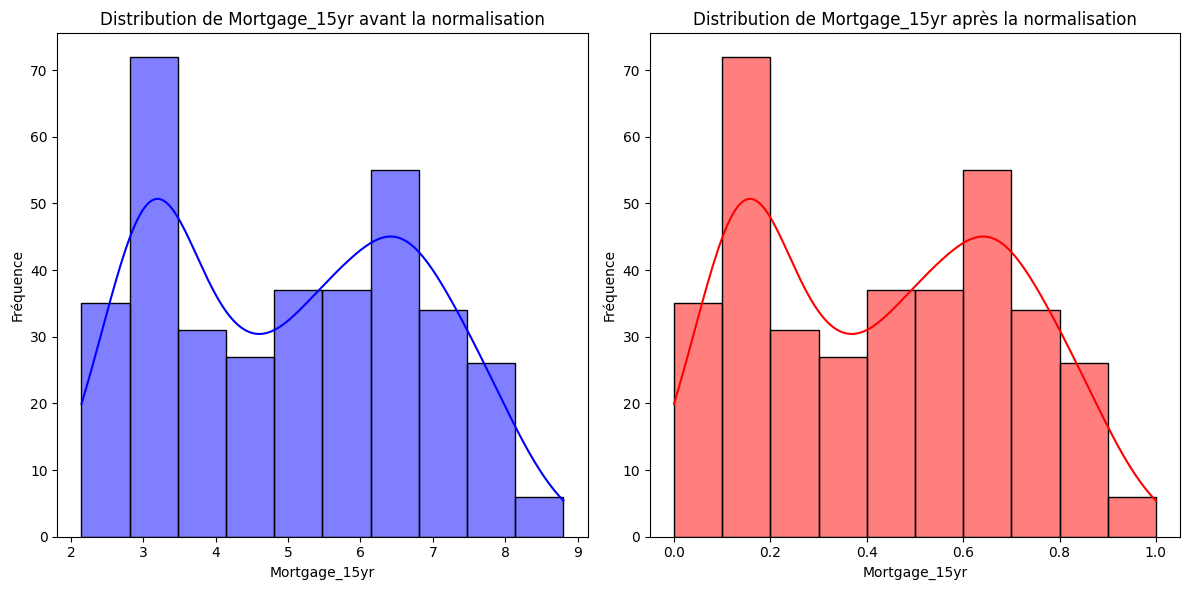

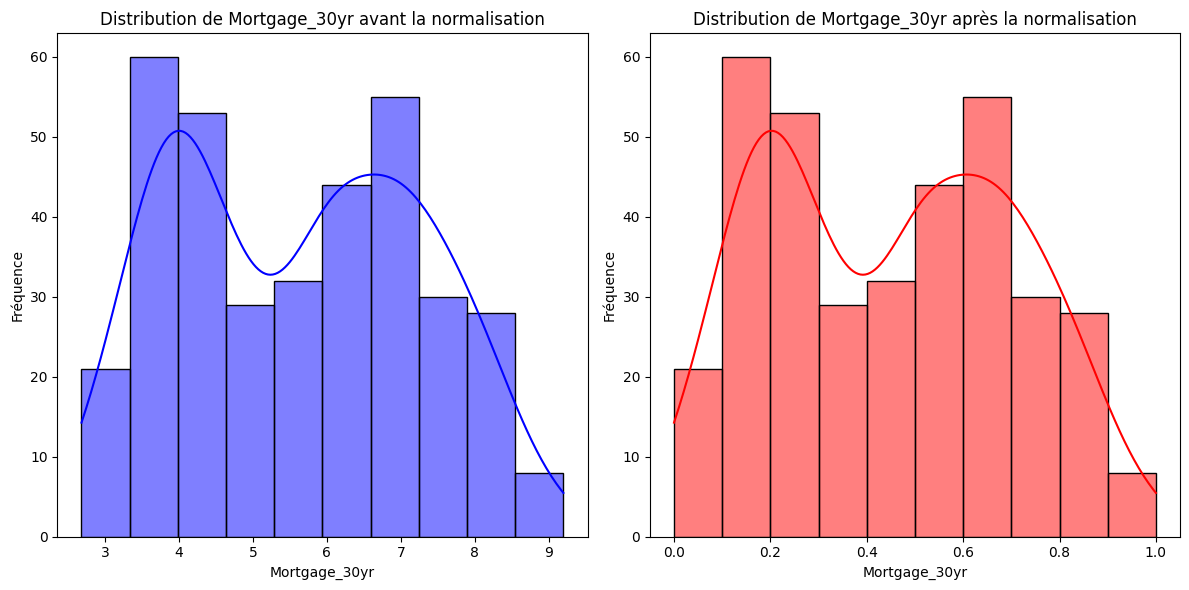

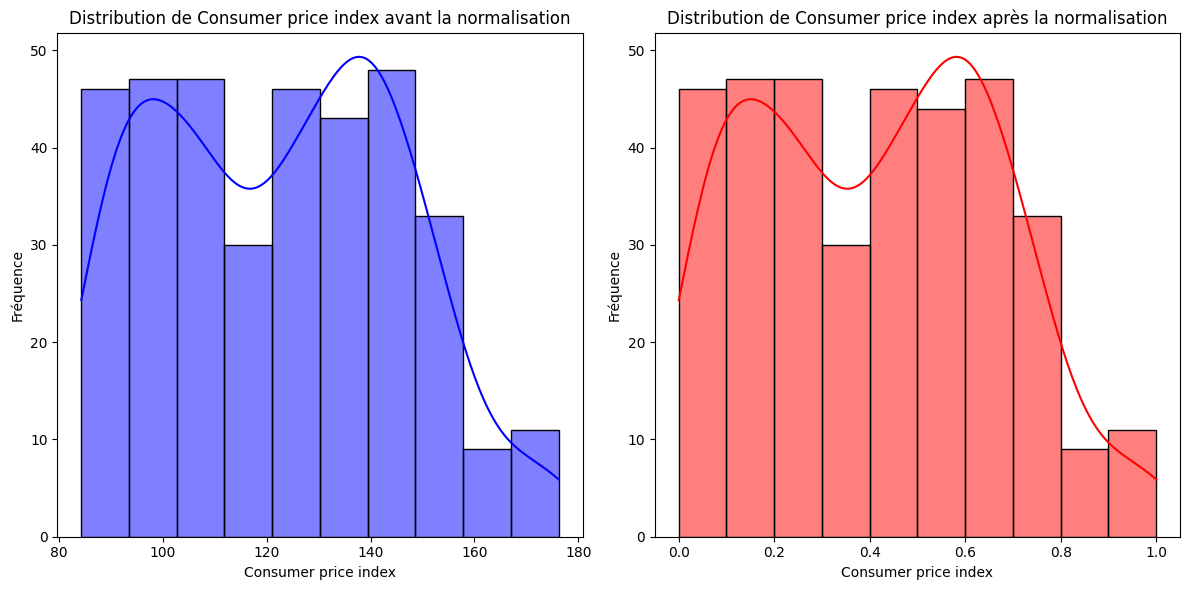

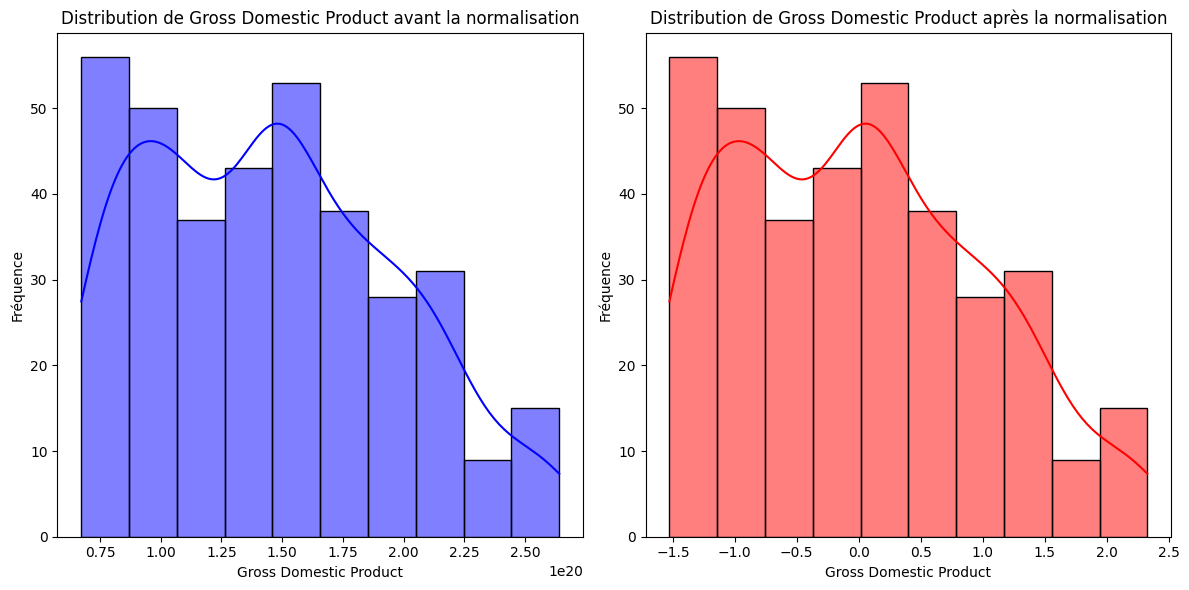

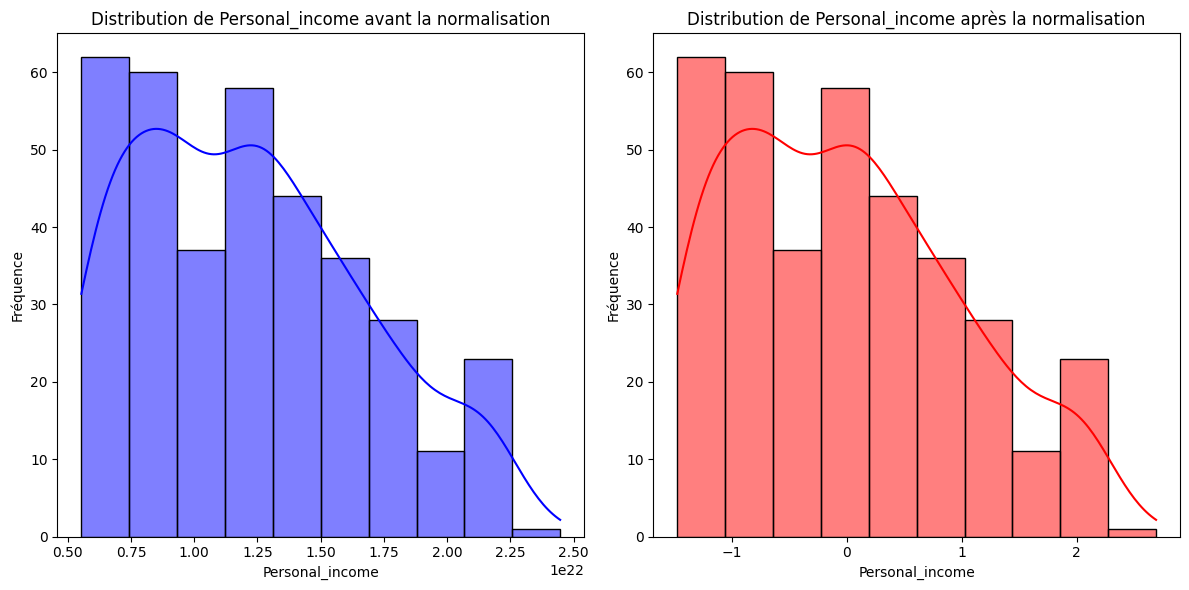

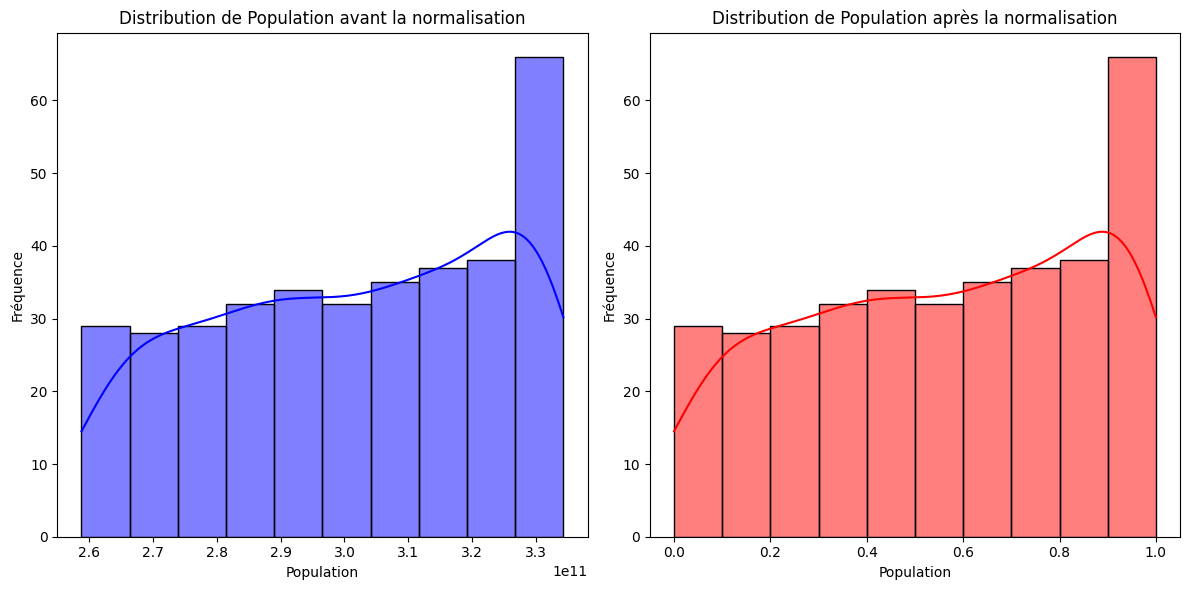

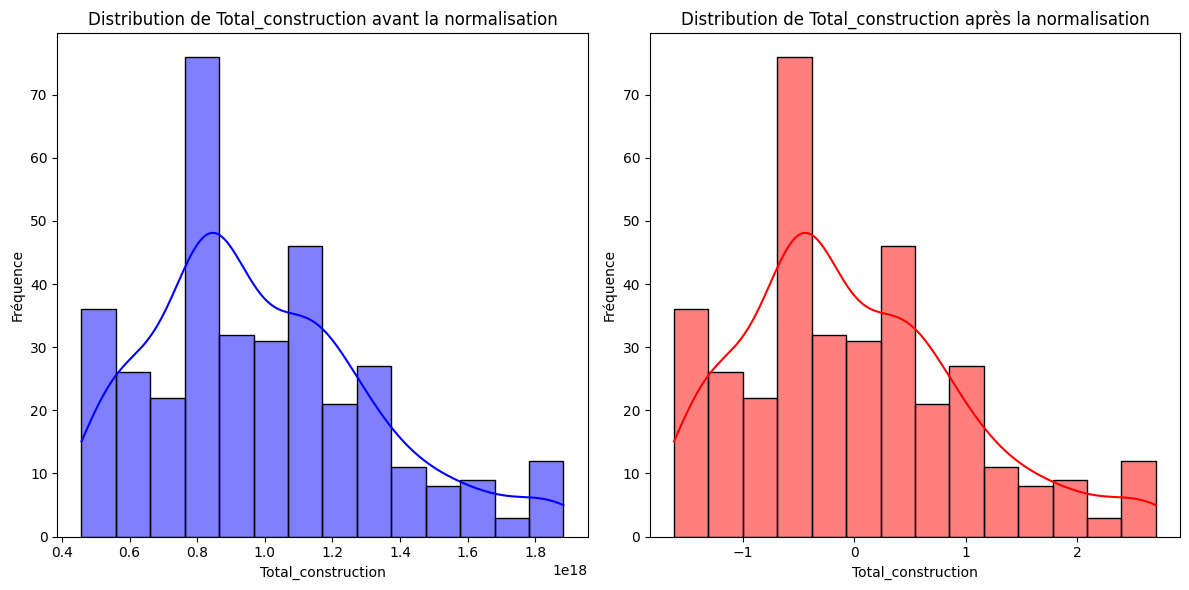

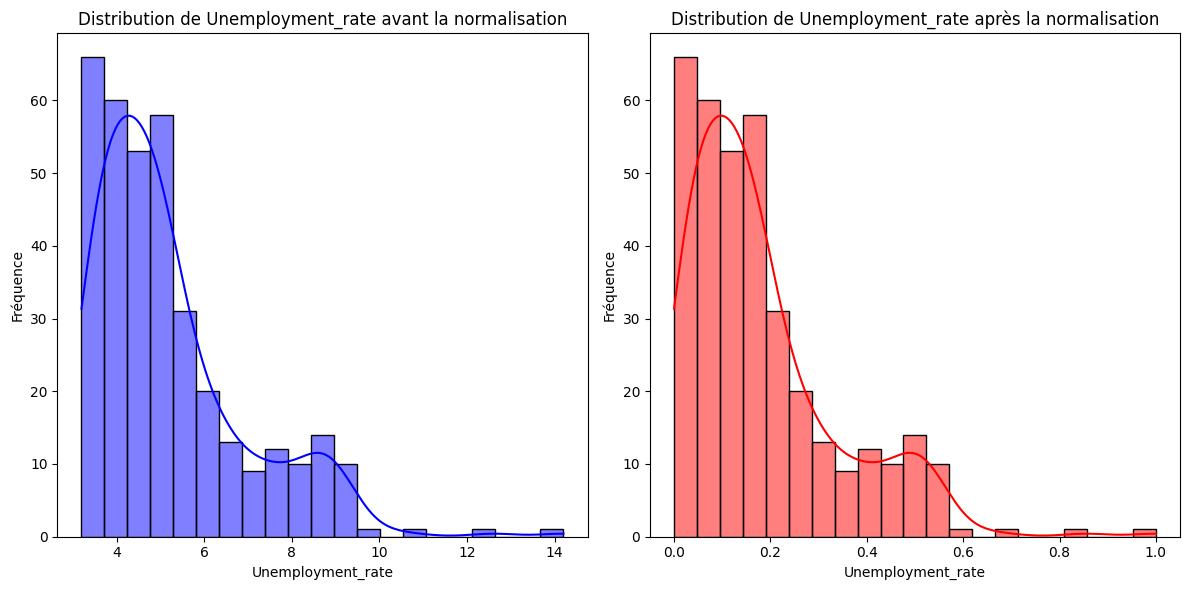

In [11]:


# Tracé de la distribution avant et après la normalisation pour chaque variable explicative
plt.figure(figsize=(16, 12))
for variable in variables_explicatives:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], color='blue', kde=True)
    plt.title(f'Distribution de {variable} avant la normalisation')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    plt.subplot(1, 2, 2)
    sns.histplot(df_normalized2[variable], color='red', kde=True)
    plt.title(f'Distribution de {variable} après la normalisation')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    plt.tight_layout()
    plt.show()


######On remarque que la diference entre les corelation pour la methode 2 tembe ver 0 sans changement dans la distribution 
    #donc on Gard la methode 2 pour normaliser 

df=df_normalized2

df.to_csv('data\\Data_clean_normalisé.csv', index=False)
